Reference: https://towardsdatascience.com/develop-an-interactive-drawing-recognition-app-based-on-cnn-deploy-it-with-flask-95a805de10c0

In [3]:
import numpy as np
import pandas as pd

import keras
import keras.utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

## Preprocessing

In [4]:
# load the data
alarmclock = np.load('dataset/full_numpy_bitmap_alarm clock.npy')
apple = np.load('dataset/full_numpy_bitmap_apple.npy')
banana = np.load('dataset/full_numpy_bitmap_banana.npy')
bed = np.load('dataset/full_numpy_bitmap_bed.npy')
bicycle = np.load('dataset/full_numpy_bitmap_bicycle.npy')
bird = np.load('dataset/full_numpy_bitmap_bird.npy')
book = np.load('dataset/full_numpy_bitmap_book.npy')

data = [alarmclock, apple, banana, bed, bicycle, bird, book]

# checking dataset

In [5]:
bed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
bed[0].shape

(784,)

In [7]:
# adding class label
# for simplicity hard program it
# IMPROVEMENT: automate the labelling process

alarmclock = np.c_[alarmclock, np.zeros(len(alarmclock))]
apple = np.c_[apple, np.ones(len(apple))]
banana = np.c_[banana, 2*np.ones(len(banana))]
bed = np.c_[bed, 3*np.ones(len(bed))]
bicycle = np.c_[bicycle, 4*np.ones(len(bicycle))]
bird = np.c_[bird, 5*np.ones(len(bird))]
book = np.c_[book, 6*np.ones(len(book))]

In [8]:

def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

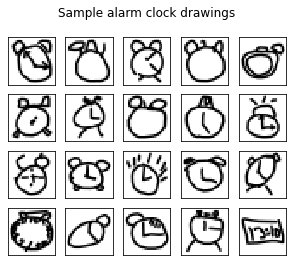

In [9]:
# check indivisual datasets
plot_samples(alarmclock, title= 'Sample alarm clock drawings\n')

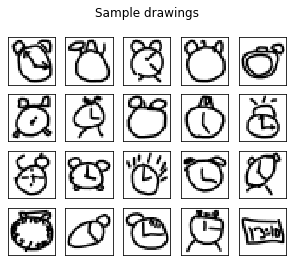

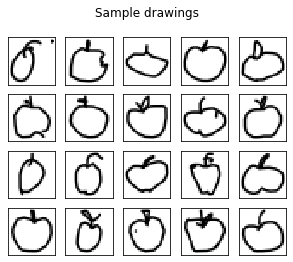

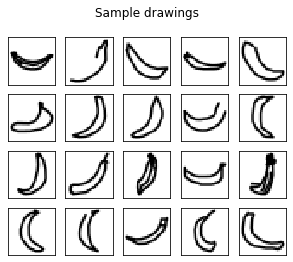

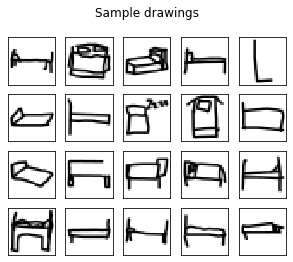

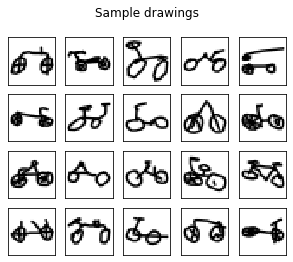

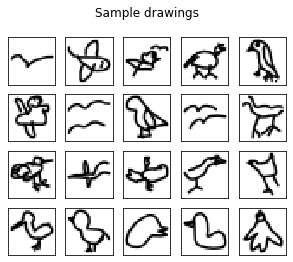

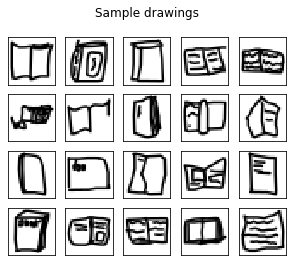

In [10]:
for datasetname in data:    
    plot_samples(datasetname, title= f'Sample drawings\n')

# Separate data and label
needs to be automated


In [11]:
y = np.concatenate((alarmclock[:10000,-1], apple[:10000,-1], banana[:10000,-1], bed[:10000,-1], bicycle[:10000,-1], bird[:10000,-1], book[:10000, -1]), axis=0).astype('float32')
y # the last column
y.shape

(70000,)

In [12]:
# Merging arrays and splitting the features and labels
X = np.concatenate((alarmclock[:10000,:-1], apple[:10000,:-1], banana[:10000,:-1], bed[:10000,:-1], bicycle[:10000,:-1], bird[:10000,:-1], book[:10000,:-1]), axis=0).astype('float32') 
X # all columns but the last
X.shape

(70000, 784)

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X/255., y, test_size = 0.2, random_state =0)

In [14]:
#one hot encoding the output
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [15]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [16]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=19, batch_size=200)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/19
280/280 [==============================] - 14s 47ms/step - loss: 0.6508 - accuracy: 0.7914 - val_loss: 0.3299 - val_accuracy: 0.9003
Epoch 2/19
280/280 [==============================] - 14s 48ms/step - loss: 0.3341 - accuracy: 0.8967 - val_loss: 0.2581 - val_accuracy: 0.9202
Epoch 3/19
280/280 [==============================] - 14s 51ms/step - loss: 0.2762 - accuracy: 0.9140 - val_loss: 0.2337 - val_accuracy: 0.9261
Epoch 4/19
280/280 [==============================] - 15s 54ms/step - loss: 0.2445 - accuracy: 0.9231 - val_loss: 0.2118 - val_accuracy: 0.9330
Epoch 5/19
280/280 [==============================] - 14s 51ms/step - loss: 0.2221 - accuracy: 0.9296 - val_loss: 0.1952 - val_accuracy: 0.9366
Epoch 6/19
280/280 [==============================] - 14s 48ms/step - loss: 0.2028 - accuracy: 0.9365 - val_loss: 0.1857 - val_accuracy: 0.9407
Epoch 7/19
280/280 [==============================] - 12s 42ms/step - loss: 0.1895 - accuracy: 0.9393 - val_loss: 0.1779 - val_accuracy:

In [18]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

In [19]:
y_pred_cnn = model_cnn.predict(X_test_cnn, verbose=1)
pred_class=np.argmax(y_pred_cnn, axis=1)

438/438 [==============================] - 2s 3ms/step


In [20]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, pred_class)

In [21]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

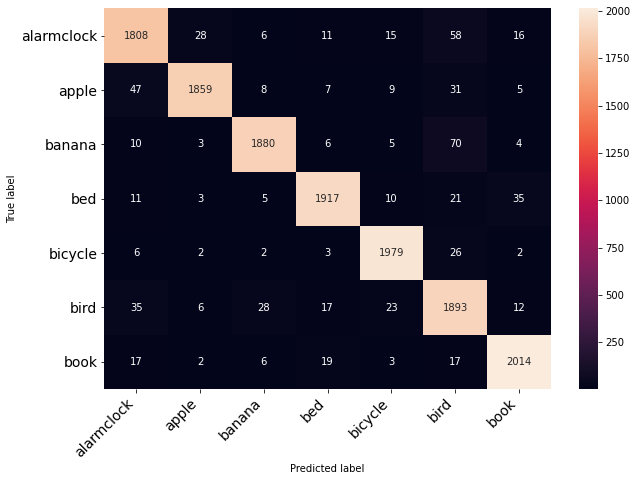

In [22]:
class_names = ["alarmclock", "apple", "banana", "bed", "bicycle", "bird", "book"]
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

In [23]:
#Misclassification when y_pred and y_test are different.
misclassified = X_test[pred_class != y_test]

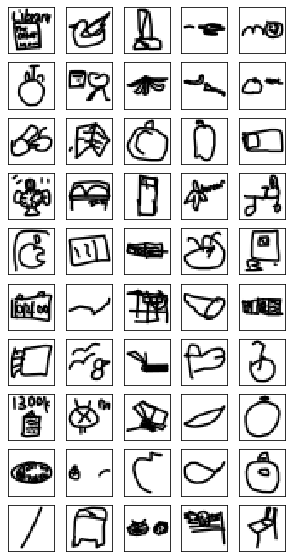

In [24]:
plot_samples(misclassified, rows=10, cols=5, title='')

In [25]:
import pickle
with open('model_cnn.pkl', 'wb') as file:
      pickle.dump(model_cnn, file)